# Predicting The Re-Sale Value of Used Cars

## Problem Statement

In the United States used cars represent almost half of the U.S. auto retail market and is the largest retail segment of the economy. There has been a shift by consumers to purchase more affordable previously owned vechinces as automobile debt has surpassed 1 trillion dollars and now makes up 9.5% of American consumer debt. The market for used vehicles is challenging to navigate for many consumers as prices can vary widely as many formulas fail to take into the many nuances of a car.

Consumers can use online valuation calculators to get an estimate on a car but these sites tend to only factor in a few features like make, model and miles driven. They also value the car on a straight line depreciation formula which can be overly simplistic, especially for cars that were well maintained by the previous owner. Buyers may look to third party appraisals to price a second hand car, but often these appraisals are costly and time consuming. 

In the current used car market landscape there is a need by both buyers and sellers for a price prediciton method to better determine the fair market value of a car. Individual sellers can use this price prediciton model to better price their cars before putting them on the market. Buyers can use additional predictions to reference them against popular online valuators to get a better idea of the fair market value of a car. In the often times overwhelming used car market a price predicition model that accounts for the nuances of an automobiles many features will benefit both buyers and sellers to help determine the actual worth of a used car. 

A series of regression models will be utilized to predict the price of the cars in our dataset. These include; Linear Regression, Ridge, Lasso, Decision Trees, Random Forest, Extra Trees and Gradient Boost. The model will be evaluated using the metric Root Mean Squared Error (RMSE). This metric was chosen because it provides us with a number that is more easily interpreted for our parameter of interst, whic is price. In this case the metric will show the difference in monetary units (Euros) the predicted price was from the actual price. A benchmark RMSE score within 10% of the mean value of the cars in our dataset is how we will determine if we have a successful model. This would mean if the cars in the data set had a mean value of 5,000 a succesful RMSE score would be <= 500. A score like this would be helpful as a secondary appraisal to help consumers confirm they are paying a fair value for a used car. 

In [1400]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

## Executive Summary

Predicting the price of used cars is an important problem that has great value in real world applications. As more consumers shift away from leasing or financing cars, more people are looking toward the used car market. Navigating the used car market can be challenging and it is unclear to many buyers and sellers as what the fair market value of a car is.  Intuition tells us that the older the car and the more miles it has on the odometer the cheaper it will be. However, in the data that was collected for this project we observed prices varying greatly in both the age and miles driven categories. This led us to believe that there are many additional features that are affecting the price of a used car. 

Given the extreme range in our target variable price we knew we would have to remove outliers on both ends of the price range. There were cars listed at over 150,000 euros and cars listed under 500 euros. For a used car prediction model we didn’t want to have cars priced extremely high as these vehicles are likely exotics or collectors items and did not represent what we believed to be the average used car. Addtionally we wanted to remove cars below 500 euros as these could be considered “junkers” and may be bought just for parts or scrap metal. During the modelling phase we kept scaling back on the max price as the scores of the model were very poor. The high price cars were making it very difficult for the model to learn. When going back to look at the distribution of prices the majority of the cars were in the 500 – 20,000 euro range. We ended up settling on this price range for our target variable. We believed this was a true representation on what a normal person would spend on a used car. Prices above this threshold were equivalent of the price of some new cars and we wanted to focus on a realistic price range for the average consumer. 

We wanted to use a number of different models in attempt to get the best score. We started with a simplified approach dropping the null values from our data set and running a linear regression model. We then went back and imputed the mode values for our categorical variables and re-ran the linear regression model where we observed an improvement in our score. Building off of that adjustment we introduced new models, Ridge and Lasso were used to regularize the (insert regularize info). Decision Tree, Random Forests and Extra Trees were used and the scores continued to improve. Finally, Gradient Boost was used where we observed our best score. 

Overall, the scores our models produced were poor. There were only a few features that had any impactful correlation on our models. Besides age and kilometers driven there was very weak correlation among the other features included in the model. The additional features created too much noise and it made it challenging for the models to learn.  When we scaled back to just a few features the noise was reduced and the models were less overfit but they still performed poorly. Due to the wide range in price amongst every feature, especially model and brand of car it made it extremely difficult for the models to make accurate price predictions. These results reinforce the idea that setting the actual price of a used automobile is extremely challenging and is most likely why straight line depreciation is used for this problem. 


### Contents:
- [Import Data](#Import-Data)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Convert Date Columns to Datetime](#Convert-Date-Columns-to-Datetime)
- [Identify Missing Values](#Identify-Missing-Values)
- [Address Outliers In Data Set](#Address-Outliers-In-Data-Set)
- [Price](#Price)
- [Kilometers Driven](#Kilometers-Driven)
- [Power PS](#Power-PS)
- [Vehichle Type](#Vehichle-Type)
- [Car Brands](#Car-Brands)
- [Fuel Types](#Fuel-Types)
- [Kilometers vs. Price](#Kilometers-vs.-Price)
- [Transmission Type](#Transmission-Type)
- [Damage To Vehicle](#Damage-To-Vehicle)
- [Revisting Max Price](#Revisting-Max-Price)
- [Preprocessing](#Preprocessing)
- [Train Test Split](#Train-Test-Split)
- [Baseline Model](#Baseline-Model)
- [Linear Regression](#Linear-Regression)
- [Ridge](#Ridge)
- [Lasso](#Lasso)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [Extra Trees](#Extra-Trees)
- [Gradient Boost](#Gradient-Boost)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Interpretable Model/Model Coefficients](#Interpretable-Model/Model-Coefficients)
- [Modeling Assumptions](#Modeling-Assumptions)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
- [Sources](#Sources)



## Import Data

In [1134]:
df = pd.read_csv('./data/autos.csv', encoding = 'latin-1')

In [1135]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Data Dictionary

The data for this project was taken from autos from Kaggle. The data was scraped from Ebay Kleinanzeigen, which is a Ebay subsidiary based in Germany. Translation of German words will be provided at points along this notebook. 

|Column|Type|Description|
|:---|---|:---|
|Date Crawled|string|When this ad was first scraped from the website 
|Name|string|Name of the Car (Ex. VW Golf 1.87)
|Seller|string|Seller Type, Private or Dealer 
|Offer Type|string|The average sat Math score
|Price|int|Listed price of car
|AB Test|string|Offer is a test or control 
|Vehicle Type|string|Type of vehcile (SUV, Coupe, Van, etc.)
|Year of Registration|int|When the vehicle was first registered
|Gearbox|string|Transmission type (Manual or Automatic)
|Power Ps|int|Power of the car is PS
|Model|string|Model of the vehicle (VW Golf, Audi A4, BMW M3)
|Kilometer|int|Number of ilometers driven
|Month of Registraion|string|Which month the car was first registered
|Fuel Type|string|What type of fuel the car uses (Diesel, Gasoline, Electric)
|Brand|string|The Vehicle Manufactuer (Toyota, Volkwagen, Honda)
|Not Repaired Damage|string|If the car has damage that is unrepaired
|Date Created|string|The date for which the ad at ebay was created
|Postal Code|int|Postal Code of Seller/Cars location
|Last Seen|string|When the web scraper last saw the ad online

In [1136]:
new_columns_dict = {
    'dateCrawled': 'date crawled',
    'offerType': 'offer type',
    'abtest': 'AB test',
    'vehicleType': 'vehicle type',
    'yearOfRegistration': 'year of registration',
    'gearbox': 'gear box',
    'powerPS': 'power ps',
    'monthOfRegistration': 'month of registration',
    'fuelType': 'fuel type',
    'notRepairedDamage': 'unrepaired damage',
    'dateCreated': 'date created',
    'nrOfPictures': 'pictures of car',
    'postalCode':'postal code',
    'lastSeen': 'last seen',

}

df.rename(columns=new_columns_dict, inplace=True)

Column headers were renamed to be more descriptive and human readable 

# Exploratory Data Analysis

In [1137]:
df.shape

(371528, 20)

Our data is comprised of 371,528 rows, which are the individual used car listings that were scraped from ebay-klienzwagan (E-Bay subsidiary based in Germany). There are 20 columsn which represent various features of the used car being sold. 

In [1138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
year of registration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
power ps,371528.0,115.549477,1.921396e+02,0.0,70.0,105.0,150.0,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
month of registration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
pictures of car,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postal code,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


The above chart gives us an intial look at some of the summmary statisitcs of our data. We can see that the mean price of a used car in the dataset is €17,295. This price seems high for a used car which makes one think there may be a large number of outliers in the dataset. We also observe a mean value of 125,618 for kilometer which represents the distance the car has been driven. We can infer from this number that many of the cars in the dataset have higher mileage. 

In [1139]:
df.dtypes

date crawled             object
name                     object
seller                   object
offer type               object
price                     int64
AB test                  object
vehicle type             object
year of registration      int64
gear box                 object
power ps                  int64
model                    object
kilometer                 int64
month of registration     int64
fuel type                object
brand                    object
unrepaired damage        object
date created             object
pictures of car           int64
postal code               int64
last seen                object
dtype: object

The above shows what type of data types the features in the dataset are. We may need to convert data types in order to analyze and process the data appropriately. For example date crawled, date created and last seen are currently objects. We will need to convert this features to date times in order to calculate how long a listing has been posted on the website. We would be unable to do this if these features remained as objects. 

### Convert date columns to datetime

In [1140]:
df['date crawled'] = pd.to_datetime(df['date crawled'])

In [1141]:
df['date created'] = pd.to_datetime(df['date created'])

In [1142]:
df['last seen'] = pd.to_datetime(df['last seen'])

In [1143]:
df['ad duration'] = df['last seen'] - df['date created']

In [1144]:
df['ad duration'].dtypes

dtype('<m8[ns]')

In [1145]:
ad_test = df['ad duration'][0]

In [1146]:
ad_test.days

14

In [1147]:
df['ad duration'] = df['ad duration'].apply(lambda x: x.days)

We believe the features last seen and date created could be used to estimate how long a car has been listed online. A listing that has been up on the website for a longer period of time may indicate that the car is undesirable and may be a feature that is related to the price. 

In order to create the feature "ad duration" we converted the features realted to date/time to datetime. We then subtracted "date created" from "last seen" to calculate the number of days the listing has been up. Ad duration is then converted to an integer which will be a continuous variable that is included in our model.

### Identify Missing Values

We want to identify any missing values we have in our dataset so we can decide how to address the missing data prior to modeling. That data that has been collected is valuable and we do not want to drop a row from our dataset if it is missing a value from one feature. 

In [1148]:
df.isnull().sum()

date crawled                 0
name                         0
seller                       0
offer type                   0
price                        0
AB test                      0
vehicle type             37869
year of registration         0
gear box                 20209
power ps                     0
model                    20484
kilometer                    0
month of registration        0
fuel type                33386
brand                        0
unrepaired damage        72060
date created                 0
pictures of car              0
postal code                  0
last seen                    0
ad duration                  0
dtype: int64

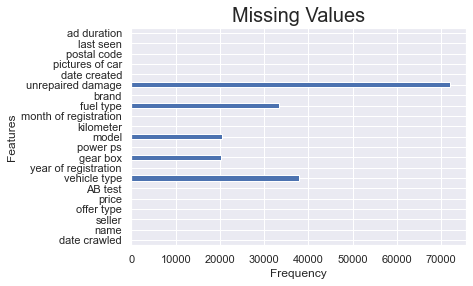

In [1149]:
#visualize null values
plt.title("Missing Values", size = 20)
plt.xlabel("Frequency")
plt.ylabel("Features")
df.isnull().sum().plot(kind = 'barh');

The above graph shows which features are missing from our dataset. Five features have missing values with "unrepaired damage" having the highest count of missing values. Since this category only applies to owners who have had damage to their car it is possible that owners who did not have damage to their car omitted a response to this question while listing their car for sale. 

The other missing categories vehicle type, model, gear box, and vehicle type are important features of a car that all cars have. It is unclear why these features are missing but we will have to address these missing values in some way. If we are missing the vehicle type but have the model of the car we will be able to determine the vehicle type with outside research. 

We also want to determine if any null values are less than 5% of the dataset. If so we may just drop the null values from the dataset, if not we will have to impute the missing data or take a pattern submodel approach if possible. 

In [1150]:
nulls = df.isnull().sum()
nulls = pd.DataFrame(nulls, columns = ['null'])
total = len(df)
nulls['percent']  = nulls['null']/total
nulls.sort_values('percent', ascending = False)

,null,percent
unrepaired damage,72060,0.193956
vehicle type,37869,0.101928
fuel type,33386,0.089861
model,20484,0.055134
gear box,20209,0.054394
month of registration,0,0.000000
last seen,0,0.000000
postal code,0,0.000000
pictures of car,0,0.000000
date created,0,0.000000


Above shows us the percentage of missing values in our dataset. If we are missing 5% or less from one feature it may be ok to drop these car listings as this amount is inconsequential. Model and gear box are both just above the 5% threshold and we will not drop these data points and will have to determine another way to address the missing values. 

#### Missing Data

We want to know if the data is Missing Completely At Random (MCAR), Missing At Random (MAR) or Not Missing At Random (NMAR). We will look to see if any of the columns have a higher number of shared nulls to see if a pattern submodel approach can be taken to handle the missing data. Pattern submodels are a set of submodels for every missing data pattern that are fit using only data from that pattern. This will also allow us to not impute any missing values, which is essentially making up data and can be an ureliable technique when handling missing data. 

In [1151]:
df.head(1)

,date crawled,name,seller,offer type,price,AB test,vehicle type,year of registration,gear box,power ps,...,kilometer,month of registration,fuel type,brand,unrepaired damage,date created,pictures of car,postal code,last seen,ad duration
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14


In [1152]:
no_damage = df['unrepaired damage'].isnull()
vtype = df["vehicle type"].isnull()
shared_null = no_damage & vtype

In [1153]:
print(f"No Damage Nulls: {sum(no_damage)}")
print(f"Vehicle Type Nulls: {sum(vtype)}")
print(f"Shared Nulls: {sum(shared_null)}")

No Damage Nulls: 72060
Vehicle Type Nulls: 37869
Shared Nulls: 20756


In [1154]:
vehicle_nulls = df["vehicle type"].isnull()
fuel_nulls = df["fuel type"].isnull()
shared_nulls = vehicle_nulls & fuel_nulls

In [1155]:
print(f"Vehicle Type Nulls: {sum(vehicle_nulls)}")
print(f"Fuel Type Nulls: {sum(fuel_nulls)}")
print(f"Shared Nulls: {sum(shared_nulls)}")

Vehicle Type Nulls: 37869
Fuel Type Nulls: 33386
Shared Nulls: 17495


In [1156]:
gearbox_nulls = df["gear box"].isnull()
model_nulls = df["model"].isnull()
shared_nulls_1 = gearbox_nulls & model_nulls

In [1157]:
print(f"Gearbox Nulls: {sum(gearbox_nulls)}")
print(f"Model Nulls: {sum(model_nulls)}")
print(f"Shared Nulls: {sum(shared_nulls_1)}")

Gearbox Nulls: 20209
Model Nulls: 20484
Shared Nulls: 4233


In [1158]:
vehicle_type_nulls = df["vehicle type"].isnull()
model_nulls1 = df["model"].isnull()
shared_nulls_2 = vehicle_type_nulls & model_nulls

In [1159]:
print(f"Gearbox Nulls: {sum(vehicle_type_nulls)}")
print(f"Model Nulls: {sum(model_nulls1)}")
print(f"Shared Nulls: {sum(shared_nulls_2)}")

Gearbox Nulls: 37869
Model Nulls: 20484
Shared Nulls: 6917


The missing data in this data set appears to be missing completely at random (MCAR). We anlayzed the shared null values of our features with missing values and observed a low percentage of shared nulls amongst them. Initially we wanted to use a pattern sub model approach to address the missing data but because the data is MCAR we will not be able to use the pattern submodel and we will have impute the missing data using different techniques. 

## Address Outliers In Data Set

## Price

Initially when we looked at summary statistics of our data we believed there were outliers in the dataset. We will now look into the prices in the dataset and establish a minimum and maximum price to include in our modeling. We won't want to include prices that are too high as they do not represent a realistic price of a used car. 

In [1160]:
print(f'Mean Price of Cars: {df.price.mean()}')
print(f'Median Price of Cars: {df.price.median()}')
print(f'Max Car Price: {df.price.max()}') 
print(f'Min Car Price: {df.price.min()}')

Mean Price of Cars: 17295.14186548524
Median Price of Cars: 2950.0
Max Car Price: 2147483647
Min Car Price: 0


Above values show the mean, median, maximum and minimum prices for cars in our dataset. The max price is extremely high and it is very unlikely that any car would be worth that amount of money. This outlier will be removed from the data. We also observe a minimum price of 0, which is not accurate as no seller would be listing a car on a website for free. Even if the owner was trying to give away an old car we have to remove these values from our dataset because they will affect the performance of our model.

In [1161]:
df[df['price'] == 0].shape

(10778, 21)

We observe just over 10,000 cars that are listed at €0. Removing 10,000 rows from our dataset is less than 2% of total data and is not consequential. 

In [1162]:
df[df['price'] > 150_000].shape

(232, 21)

In [1163]:
df[df['price'] < 500].shape

(36062, 21)

Outside research shows that any car priced below 500 is considered "junk status". We do not want to include cars in this price range as we are trying to make predictions of cars that would actually be used for transportation. We also need to set a minimum threshold and can set it here to include all cars that aren't in the "junk status" category. 

In [1164]:
#get percentage of cars above 150,000 (df[df['price'] > 150_000].value_counts(nomralize = True))
len(df[df.price > 15000]) / len(df)

0.08620346245774207

In [1165]:
df = df[df['price'] > 499]

Setting the min at 500 as outside research shows you can expect about $250-$500 for your junk car, depending on the vehicle's weight. We want to eliminate cars in the junk status range as a consumer is unlikely to purchase an car in this condition to actual use for transportation purposes.

In [1166]:
df = df[df['price'] <= 150_000]

In [1167]:
df.shape

(335234, 21)

In [1168]:
print(f'Mean Price of Cars: {df.price.mean()}')
print(f'Median Price of Cars: {df.price.median()}')
print(f'Max Car Price: {df.price.max()}') 
print(f'Min Car Price: {df.price.min()}')

Mean Price of Cars: 6249.5506004760855
Median Price of Cars: 3500.0
Max Car Price: 150000
Min Car Price: 500


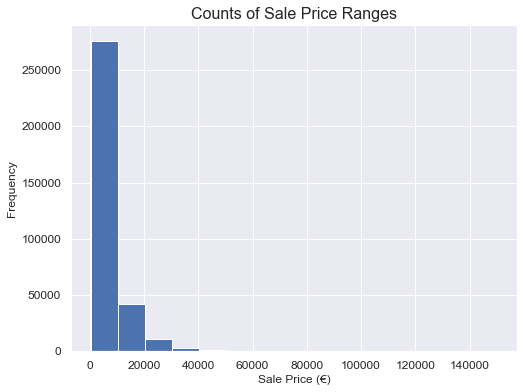

In [1169]:
size = 12
plt.figure(figsize=(8,6))
plt.title("Counts of Sale Price Ranges", size = 16)
plt.xlabel("Sale Price (€)")
plt.ylabel("Frequency",)
plt.xticks(size = size)
plt.yticks(size = size)
df["price"].hist(bins = 15);

There are cars that a worth more than 150,000 euro and after further inspection they do look legitimately priced as they are exotic or luxury cars. Since most of the data is clustered toward the low end of the price range (between 5,000 - 10,000 euros) we decided to only focused on vehicles between 500 euro and 20,000 euro. We have a considerable range in the quality of automobiles in our dataset. Only the lower range we have cars that could be consdiered "junkers" all the way up to luxury automobiles. However, the collectors items are the outliers in the dataset and we felt they could be included up until a certain point, there were only 232 cars priced over 150,000 so we decided to establish our max price there. Max price may be reduced if we observe poor RMSE scores. The metric RMSE is greatly affected by outliers and this is something to be aware of once we begin modeling. 

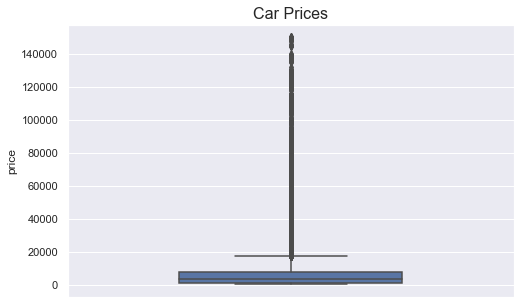

In [1170]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)
plt.title("Car Prices", size = 16);

The above box plot is somewhat hard to interpret because we have so many outliers. The majority of cars in our data set are less than €10,000 with a mean value just under €5,000. The upper quartile range is around €7,500. We observe litte spread between the firt quartile and third quartlie range but due to the large number of outliers it gives our box plot the squashed appearence. We have a lot of data in our data set and a large number of outliers. 

In [1171]:
adjusted_price = np.log(df['price'])

We created a variable to look at the logarithmic values of our target variable price. Because our linear scale is right skewed we hope to observe more of a normal distribution with our logarithmic scale prices.  

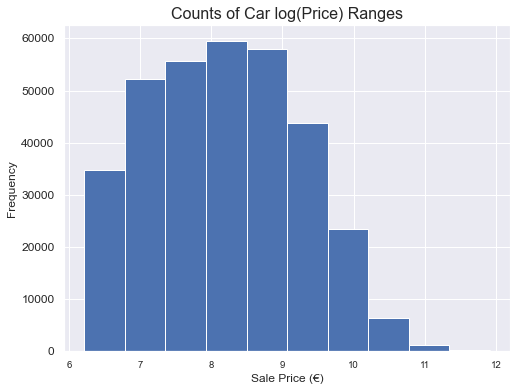

In [1172]:
size = 12
plt.figure(figsize=(8,6))
plt.title("Counts of Car log(Price) Ranges", size = 16)
plt.xlabel("Sale Price (€)")
plt.ylabel("Frequency")
plt.xticks(size = size * 4/5)
plt.yticks(size = size)
adjusted_price.hist(bins = 10);

We wanted to assess the log prices of the used cars in the data set. Logarithmic price scales are better than linear price scales at showing less severe pirce increases or decreases. Doing a log transformation on the data may give us better results on linear models. It makes the data more "normal". This is especially true when the data has outliers. 

### Kilometers Driven

In [1173]:
print(f'Mean Kilometers Driven: {df.kilometer.mean()}')
print(f'Median Kilometers Driven: {df.kilometer.median()}')
print(f'Max Kilometers Driven: {df.kilometer.max()}') 
print(f'Min Kilometers Driven: {df.kilometer.min()}')

Mean Kilometers Driven: 125204.81216105765
Median Kilometers Driven: 150000.0
Max Kilometers Driven: 150000
Min Kilometers Driven: 5000


In [1174]:
df[df['kilometer'] < 5_000].shape

(0, 21)

In [1175]:
df[df['kilometer'] > 200_000].shape

(0, 21)

In [1176]:
df = df[df['kilometer'] > 5000]

Above we wanted to identify any outliers in the kilometers column. Upon reviewing the values in the kilometers column it appears the number of kilometers driven is categorized by in increments of 10,000 up until 100,000 where it then increases by 25,000. This is not the traditional way to list the kilometers driven on a car. Usually the number is taken right from the odometer and it is an exact figure. Additonal research into the way the data was collected does not provide a further explanation of why the kilometers were recorded this way. We believe the kilometers on each car listing was rounded to the nearest 10,000 and nearest 25,000 for values above 100,000. An exact figure for distance driven would have been preferable but we will have to work with what we have, especially because this feature is likely to have a strong linear realtionship with price.

In [1178]:
pvt = df.pivot_table(index = 'kilometer',
                          values = 'price', aggfunc = np.mean)

<Figure size 1440x1296 with 0 Axes>

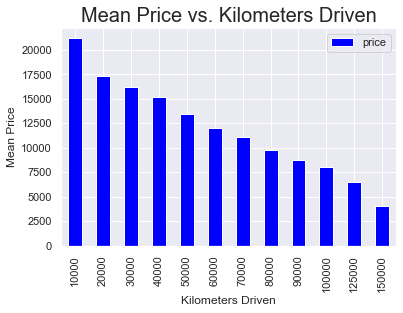

In [1179]:
plt.figure(figsize =(20, 18))
pvt.plot(kind = 'bar', color = 'blue')
plt.xlabel('Kilometers Driven')
plt.ylabel('Mean Price')
plt.xticks(rotation = 90)
plt.xticks(rotation=90)
plt.title('Mean Price vs. Kilometers Driven', size = 20);

Each car listing does not give the exact kilometers driven of a car, instead kilometers driven are grouped into sections rounded to the nearest 

Exact number of kilometers driven is not given, instead the number of of kilometers driven is segmented into categories; from 5,000 - 10,000 and then increasing by 10,000 until 100,000 where it increases by 25,000 k per grouping. 

In [1180]:
df.columns

Index(['date crawled', 'name', 'seller', 'offer type', 'price', 'AB test',
       'vehicle type', 'year of registration', 'gear box', 'power ps', 'model',
       'kilometer', 'month of registration', 'fuel type', 'brand',
       'unrepaired damage', 'date created', 'pictures of car', 'postal code',
       'last seen', 'ad duration'],
      dtype='object')

### Year of Registration

Below we wanted to identify any outliers in the dataset and decided to drop any cars with a year of registration before 1970. There were only 1,197 cars that were registred before 1970 and did not feel dropping these rows would have a great impact on our results. Additonally cars after were dropped from the dataset because the data was obtained in 2017 making it unlikely that there would be cars unreleased to the public in the data. 

In [1181]:
df[df['year of registration'] < 1970].shape

(1197, 21)

In [1182]:
df[df['year of registration'] > 2017].shape

(3733, 21)

In [1183]:
df = df[(df['year of registration'] > 1970) | (df['year of registration'] < 2020)]

In [1184]:
df = df[df['year of registration'] > 1970]

In [1185]:
df = df[df['year of registration'] < 2018]

The feature year of registration is when the vehicle was first purchased and registerd with the motor vehicle regulatory body. We will identify approximately how old the vehicles were when this data was obtained by subtracting the year of registration from the year of registration.

In [1186]:
df['age'] = 2017 - df['year of registration']

In [1187]:
df.drop(columns = 'year of registration', inplace = True)

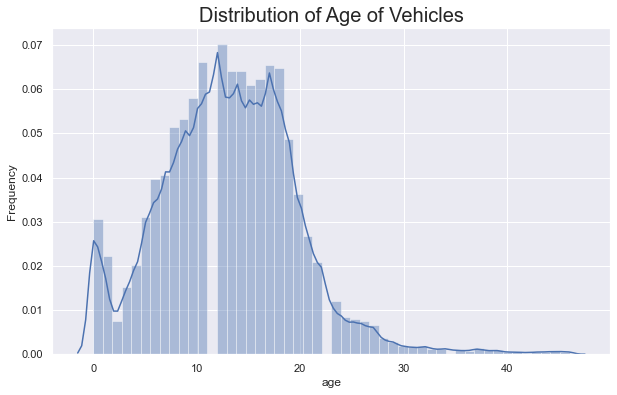

In [1188]:
plt.figure(figsize=(10,6))

sns.distplot(df['age']).set_title('Distribution of Age of Vehicles', size = 20)
plt.ylabel('Frequency');

Year Of Registration is the year the car was first registered. We can infer from this information that this is the approximate age of the car. The year of registration will be subtracted from the year the data was collect (2017) to create an age feature in our dataset. The dataset included some outliers that we knew not to be true, such as cars listed from the year 1400 or 8455. These extremes could be removed because cars were not around in the 15th century and it is unlikely we would have cars from the future available on this list of pre-owned vehichles. There were cars that dated back to the early 20th century. However we will exclude cars before 1970 as it was only a small percentage of our dataset and these cars may be antiques or classics that may throw off our predicitons. This dataset is primarily focused on your typical used automobile that the average person would drive. We want to reduce the number of exotic or antique cars to get a better predicitons. 

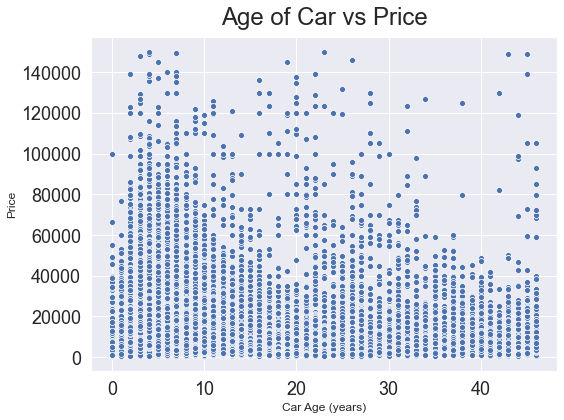

In [1189]:
plt.figure(figsize=(8,6))
plt.title("Age of Car vs Price", fontsize = size * 2, pad = size)
g = sns.scatterplot(df["age"], df["price"]);
g.set_xlabel("Car Age (years)", size = 12)
g.set_ylabel("Price", size= 12)
#g.tick_params(labelsize=18)
plt.tight_layout()

The above scatterplot shows a downward trend in price of cars with an increase in age. We do observe some older cars (40+ years) that have higher prices but these are most likely rare cars or antiques that are sold as collectors items. We observe high priced cars at almost every age between 0-40 years but we observe these expensive cars with less frequency with an increase in the age of a car.  

## Power PS

Although it’s still commonly used by carmakers, PS or Pferdestärke (horse strength in German) was actually replaced by kW as the EU's ‘legal’ measurement of engine power in 1992.  One PS is about 98.6% of a brake horsepower – the two are virtually interchangeable, and PS is sometimes referred to as 'metric horsepower'. We will convert the power ps category to kilo watts. 



In [1190]:
df[df['power ps'] == 0].shape

(26670, 21)

In [1191]:
df[df['power ps'] > 1000].shape

(233, 21)

In [1192]:
df = df[(df['power ps'] < 1000) | (df['power ps'] > 0)]

In [1193]:
df['kw power'] = df['power ps'] * 0.7355

In [1194]:
df.drop(columns = 'power ps', inplace = True)

## Address Null Values

All of the categories that have null values are categorical features. The first feature we wanted to address was model. We reviewed the value counts of each model for each brand and used the mode to to replace the missing data. The feature model had null values that was just over 5%. This is usually the threshold to just drop the missing data, but we wanted to replace the null values with the mode to see it's performance on the model. We will then remove these imputed values and run the model again to see which performs better. 

#### Model Null Values

We will impute missing model types from our dataset with the mode value of each brand. For Volkswagen missing model types will be imputed with the moddel golf. In this situation with the missing data we have this is the best method to fill null values as opposed to dropping the data completely. 

In [1195]:
vtype_mode = df.groupby('model')['vehicle type'].agg(pd.Series.mode)

In [1268]:
vtype_mode.unique

<bound method Series.unique of model
100         limousine
145        kleinwagen
147         limousine
156             kombi
159             kombi
              ...    
yaris      kleinwagen
yeti              suv
ypsilon    kleinwagen
z_reihe        cabrio
zafira            bus
Name: vehicle type, Length: 251, dtype: object>

In [1270]:
for i,vtype in vtype_mode.iteritems():
    if len(vtype) == 2:
        print(i,vtype)
    

#vtype_mode.replace(np.array(['kleinwagen', 'limousine']), 'limousine').value_counts()

above we created a the variable vtype_mode which is the mode value of the vehicle types in the dataset. This value will be used to impute the missing data for vehicle types. We observed array's in the dataset, which will cause problems during the modeling phase. Models cannot accept array's which are a list of indiviudal strings. We had to create a for loop to look through our data and locate the arrays. Once they were located we replaced those arrays with individual strings, which you will see in the cell below. 

In [1271]:
vtype_mode['elefantino'] = 'limousine'
vtype_mode['superb'] = 'limousine'
vtype_mode['serie_2'] = 'suv'

In [1198]:
df['vehicle type'].fillna(df['model'], inplace = True)

In [1199]:
df['vehicle type'] = df['vehicle type'].map(vtype_mode.to_dict()).fillna(df['vehicle type'])

In [1200]:
brand_mode = df.groupby('brand')['model'].agg(pd.Series.mode)

In [1201]:
df['model'].fillna(df['brand'], inplace = True)

In [1202]:
df['model'] = df['model'].map(brand_mode.to_dict()).fillna(df['model'])

In [1203]:
df[df['brand'] == 'sonstige_autos']['model'] = 'andere'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Pictures of Car

In [1204]:
df.drop(columns = 'pictures of car', inplace = True)

Pictures of car column did not have any data. It appears there was an error when scraping the information from the website. This column will be dropped from the data. 

#### Fuel Type & Gearbox

Fuel type and gear box (aka transmission types) were two of the five categories with missing data. Below we identify the modes of both features and will impute the modes of both variable for the missing values. Again, we feel the data we have is valuable and do not want to drop it completetly from the dataset. 

In [1205]:
df['fuel type'].value_counts(normalize = True)

benzin     0.640310
diesel     0.340021
lpg        0.016480
cng        0.001730
hybrid     0.000857
andere     0.000328
elektro    0.000273
Name: fuel type, dtype: float64

In [1206]:
df[['gear box', 'fuel type']].mode()

,gear box,fuel type
0,manuell,benzin


In [1207]:
df['gear box'].fillna(df['gear box'].mode().values[0], inplace = True)

In [1208]:
df['fuel type'].fillna(df['fuel type'].mode().values[0], inplace = True)

Imputed mode values of gearbox also known as transmission types. Manual transmissions were by far the most common transmission type so this was our best method to address the null values. Also there are only two types of transmissions so imputing the wrong value is less likey. This is not ideal to address null values but we don't want to just drop data from our dataset. 

#### Unrepaired Damage

If the car has  damage which has not repaired yet been repaired. This is a feature that could greatly impact the re-sale value of a car and is something that most likely cannot be hidden from a potential buyer. To address the null values in this category we will assume a null value means there is no un-repaired damage and the value will be filled with the answer 'nein' (no). If did not have any damange and thus did not need repair it is likely a seller ommitted an answer all together from this category. 

In [1209]:
df.head(1)

,date crawled,name,seller,offer type,price,AB test,vehicle type,gear box,model,kilometer,month of registration,fuel type,brand,unrepaired damage,date created,postal code,last seen,ad duration,age,kw power
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,manuell,a4,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50,14,6,139.745


In [1210]:
df['unrepaired damage'].unique()

array(['ja', nan, 'nein'], dtype=object)

In [ ]:
df['unrepaired damage'].value_counts()

In [1211]:
df['unrepaired damage'].fillna('nein', inplace = True)

In [1212]:
#gewerblich/commercial(english) all other sellers are private 
df.groupby('seller').size()

seller
gewerblich         1
privat        325667
dtype: int64

Seller types features shows if the person selling the car is a private seller or a commercial seller (Gewerblich is the German word for commericial). All but one of the sellers in the dataset is a private seller. This column will be dropped as it will not be able to provide us information on the relationship between seller and price because all but one seller is a private seller. 

### Vehicle Type

The column vehicle type classifies each listed vehicle by body style. Governments and private organizations have developed car classification schemes that are used for various purposes including regulation, description and categorization fo cars. This feature is likely to have some linear relationship to price as compact cars (klienwagen) are smaller cars with smaller engines which are likely to cost less than a sedan or SUV.

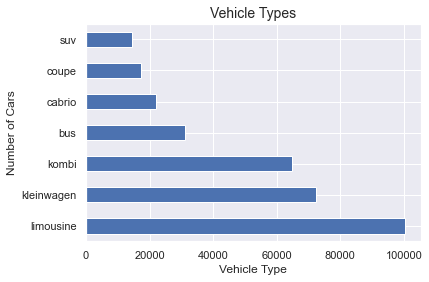

In [1213]:
df['vehicle type'].value_counts().plot(kind = 'barh')
plt.title('Vehicle Types', size = 14)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Cars');

__English Translations__ 

Limousine - Sedan

Kleinwagen - Compact Car

Kombi - Minibus

Cabrio - Convertible 

Andere - Other




The most common vehicle types in the data set are Sedans and compact cars. Europeans tend to drive smaller more fuel efficient cars because of the price of fuel in Europe is more expensive than the United States. We observe a small number of SUV's and no pickup trucks. 

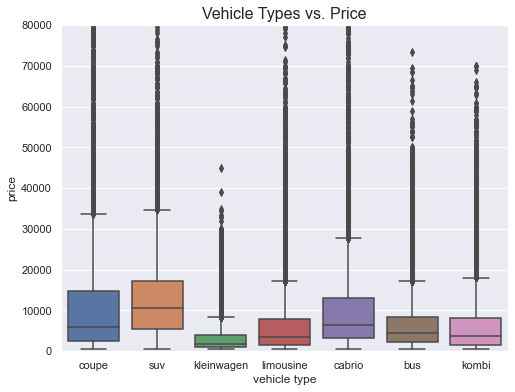

In [1214]:
var = 'vehicle type'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
plt.title("Vehicle Types vs. Price", size = 16)
fig.axis(ymin=0, ymax=80000);

Again we see a vast range of prices from somewhere in the low hundreds all the way up to 100,000. The box plots help visualize that most of the vehicle types listed have prices that are clustered below the 20,000 euro ranges. We can infer from the box plot that SUV's have the highest re-sale prices while the small compact car (kleinwagen) have the lowest retail price.

## Car Brands

Brand of car is likely to be an important feature in our model. There are certain brands in the dataset that can be considered luxury brands. Brands like Audi, BMW, and Mercedes-Benz are likely to cost more on average than many of the other brands in the data. There are likely to be brands that are less expensive and it is important to analyze what brands make up the data and how these brands are priced. 

In [1215]:
top_10_brands = df.brand.value_counts().head(10)

In [1216]:
new_labels = ["Volkswagen","BMW","Mercedes Benz","Opel","Audi","Ford","Renault","Peugeot","Fiat","Seat"]

In [1217]:
top_10_brands.index = new_labels

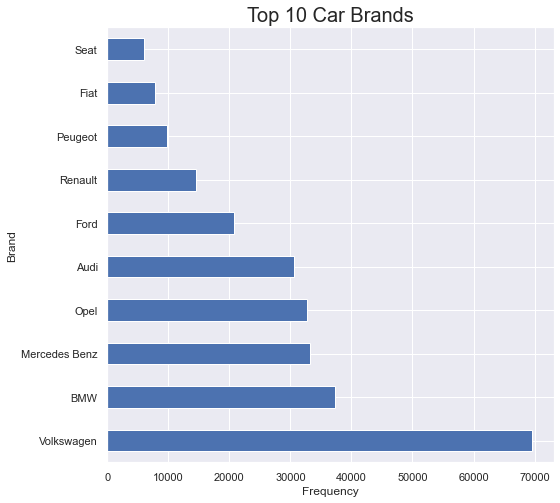

In [1218]:
#Visualize the frequency of brands in the dataset (add labels)
plt.figure(figsize = (8,8))
top_10_brands.plot(kind = 'barh')
plt.title('Top 10 Car Brands', size = 20)
plt.xlabel('Frequency')
plt.ylabel('Brand');

It comes as no surprise that four of the five most common brands are German manufacturers as this data was scraped from a German website. Volkswagen is the most common car making up approximately 20% of our dataset. Volkswagen roughy translages to the peoples car and this makes sense now as we see how popular of a car it is with German consumers. Volkswagens are affordable and reliable cars that have good fuel economy, which is very important to European consumers because of the price of gas in Europe. We only observe one car brand that comes from outside of Europe in the top 10. Ford ranks sixth on this list and outside research shows Ford has a large presence in Germany with a factory in Cologne. Fords are one of the most popular foregin (outside of Europe) car makers in Germany. 

In [1219]:
mean_price_brand = df.pivot_table(index = 'brand',
                          values = 'price', aggfunc = np.mean)

In [1220]:
new_labels = ["Volvo","Volkswagen","Trabant","Toyota","Suzuki","Subaru","Sonstige Autos","Smarto","Skoda","Seat",
             'Saab', 'Rover', 'Renault', 'Porsche', 'Peugeot', 'Opel', 'Nissan', 'Mitsubishi', 'Mini', 'Mercedes Benz',
             'Mazda', 'Land Rover', 'Lancia', 'Lada', 'Kia', 'Jeep', 'Jaguar', 'Hyundai', 'Honda', 'Ford', 'Fiat', 
              'Daihatsu', 'Daewoo', 'Dacia', 'Citroen', 'Chrysler', 'Chevrolet', 'BMW', 'Audi', 'Alfa Romeo']

Above we calculate the mean price of all the car brands in our data set and create a spreadsheet-style pivot table which will be used in a visualization to show the mean prices of the car brands we will be introducing into our model. New labels were also applied above to this column of data to make our visualization easier to read. 

In [1221]:
mean_price_brand.index = new_labels

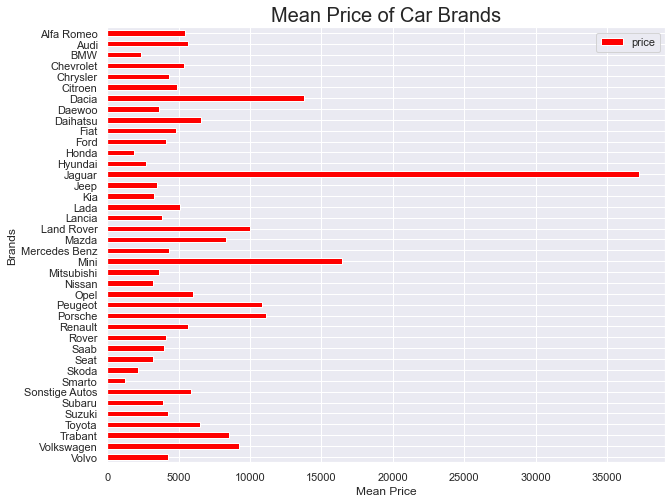

In [1222]:
mean_price_brand.plot(kind = 'barh', color = 'red', figsize = (10 ,8))
plt.title('Mean Price of Car Brands', size = 20)
plt.ylabel('Brands')
plt.xlabel('Mean Price');

Above we obeserve the mean prices of the brands of vehicles in our data set. Most of the brands mean prices are below €10,000. Only two brand Land Rover and Porsche have mean values of over €15,000. Even other luxury brands like BMW and Audi have low mean prices. This is not surprising as consumers of used cars are probably not interested in spending more than €10,000. At that point you start to enter the new car price range. 

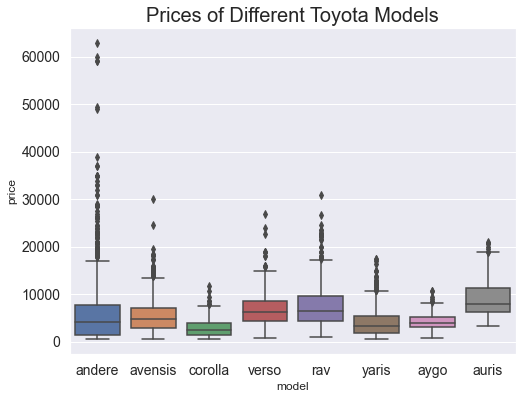

In [1223]:
size= 14
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.boxplot(x='model', y='price', data=df[df.brand == 'toyota']).\
set_title('Prices of Different Toyota Models', size = 20)
fig.axis(ymin=0, ymax=80000);
plt.xticks(rotation=0, size = size)
plt.yticks(size = size);

The above box plot shows the prices of the Toyota models in the dataset. This brand like most of the other brands in our data have a great range in price. This is most likely due to the age, number or kilometers and condition of the cars. This brand is considered luxury and some models can retail for over €60,000. However, most of the mean averages for this brand is below €10,000. This is what makes the resale value of cars interesting as they are a depreciating asset and it is difficult to maintain their value. We observe in the above visualization the values for cars from the start of their life cycle until the end. Each model shows outliers that represent prices that are very close to that models retail price and from there prices all the way down to around a €1,000. The majority of the car prices are within are in the low to mid thousands as shown in the box plots above. 

Automobiles are depreciating assets so as soon as they are purchased and driven off the lot their price begins to drop. Increasing the mileage as well as addtional wear and tear to a vehicle are contributing factors to price depreciation. This is why we observe this range of prices

### Fuel Types

Fuel type is a feature on a vehicle that is likely to have an impact on the price. A vehicle that requires diesel is usually a larger automobile that has more power. Vehicles that use diesel are usually trucks and buses. Diesel fuel is generally more expensive than gasoline and the engines can last much longer than a gasoline powered engine. This is an important feature to analyze in order to understand what types of fuel the cars in our dataset run on and the frequency of those fuel types. 


__English Translations__ 

benzin - gasoline

elektro - electric

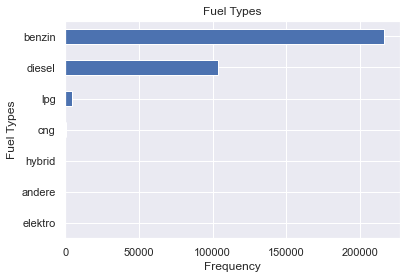

In [1224]:
df['fuel type'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Fuel Types')
plt.xlabel('Frequency')
plt.ylabel('Fuel Types');

Gasoline and diesel and the most common fuel types of the cars in the dataset. Research shows that diesel cars cost more in comparison to gas powered cars and have a higher resale value. 

Gasoline and diesel cars make up the majority of fuel types in the dataset, representing over 300,000 of the 370,000 rows. 

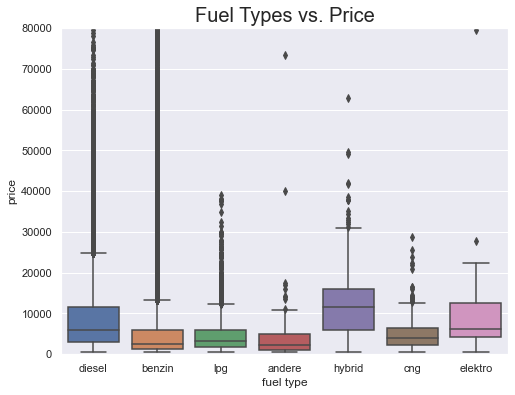

In [1225]:
#Title!!!
var = 'fuel type'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Fuel Types vs. Price', size = 20)
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=80000);

__English Translations__ 

benzin - gasoline

elektro - electric

lpg - liquid natural gas

cng - compressed natural gas

Again we see a vast range of prices from somewhere in the low hundreds all the way up to 100,000. The box plots help visualize that most of the vehicle types listed have prices that are clustered below the 20,000 euro ranges. We can infer from the box plot that vehicles with hybrid fuel types have the highest re-sale prices. For gasoline (benzin) which is the most common fuel type in our data set we observe a mean value in the low thousands and the third quartile range in the mid thousands and a maximu of approximatley 14,000 euros. Outliers continue all the way up to the ymax setting of the box plot. The graph shows us again the large number of outliers in the dataset. The same observation for gasoline engines is observed for diesel, the second most common fuel type. The other fuel types make up only a small percentage of total fuel types but they follow similar patterns as gasoline and diesel engines.  

### Kilometers

The feature kilometers represents the number of kilometers that car being sold has driven. As mentioned above when we were trying to identify outliers the listings do not provide an exact number. The numbers are rounded to the nearest 10,000 between 0 - 100,000 kilometers and then increase by 25,000 and max out at 150,000. This is not ideal because we would prefer and exact distance driven to make more accurate predictions. The feature kilometers will likely be one of the features with a strong linear relationship to price. Intuitively a person thinks that kilometers represents how much longer the car may run before it is not a viable for transportation purposes. 

In [ ]:
pvt = df.pivot_table(index = 'kilometer',
                          values = 'price', aggfunc = np.mean)

In [ ]:
plt.figure(figsize =(20, 18))
pvt.plot(kind = 'bar', color = 'blue')
plt.xlabel('Kilometers Driven')
plt.ylabel('Mean Price')
plt.xticks(rotation = 90)
plt.xticks(rotation=90)
plt.title('Mean Price vs. Kilometers Driven', size = 20);

Text(0.5, 1.0, 'Km vs Price')

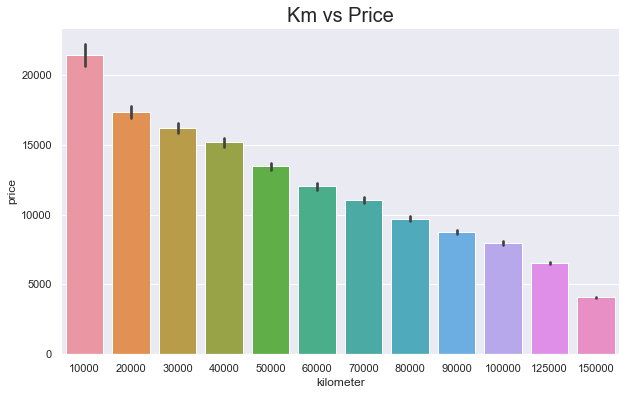

In [1226]:
plt.figure(figsize=(10,6))
sns.barplot(x='kilometer', y='price', data=df).set_title('Km vs Price', size = 20)

The above scatterplot shows that an increase in kilometers driven reduces the sale price of the car. This is no surprise as usually the first question a buyer has about a pre-owned vehicle is how many miles/kilometers it has been driven. This represents the wear on the automobile and usually a buyer can deduce how much more time on the road the car can be driven. 

In [1227]:
# cars with less than 400,000 kms
#plt.figure(figsize=(8,6))
#sns.scatterplot(x='kilometer', y='age', data=df, x_estimator = np.mean).set_title('Mean KM vs Vehicle Age', size = 20);

We observe a trend between age and kilometers. This is to be expected as the majority of the cars for sale are old cars that most likely have been driven a considerable amount. Initially we believed there would be a correlation between older cars and kilometers driven which the above graph shows. 

A main assumption of multiple linear regression is the variables are independent from one another. The above graph shows that this is not the case as we observe a linear relationship between kilometers driven and age. This is unavoidable as these two variables are intrinscly related, as the older the car is the more likely it is to be driven more, thus adding more kilometers on the odometer. 

### Transmission Type

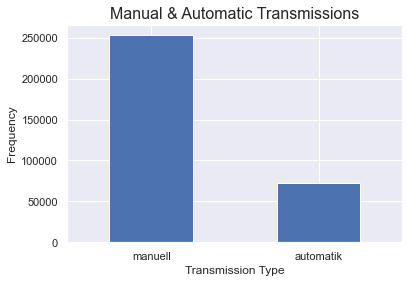

In [1228]:
df['gear box'].value_counts().plot(kind = 'bar')
plt.title('Manual & Automatic Transmissions', size = 16)
plt.xlabel('Transmission Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency');

Manual cars are about $1,000 cheaper than automatics on average, as of 2019. In addition, older manuals have a greater fuel economy than automatics of a similar age. That's not just because manual cars lack fuel-draining torque converters. It's also because manual cars have lighter transmissions. Manual transmissions are much popular in Europe which is were this data is derived from. 

In [1229]:
gb_pvt = df.pivot_table(index = 'gear box',
                          values = 'price', aggfunc = np.mean)

In [1230]:
new_labels_ = ['Automatic', 'Manual']

Above we created new labels for the bargraph with the appropriate english translations

In [1231]:
gb_pvt.index = new_labels_

<Figure size 1152x648 with 0 Axes>

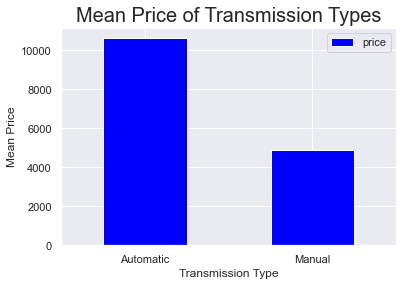

In [1232]:
plt.figure(figsize =(16, 9))
gb_pvt.plot(kind = 'bar', color = 'blue')
plt.xlabel('Transmission Type')
plt.ylabel('Mean Price')
plt.xticks(rotation = 0)
plt.title('Mean Price of Transmission Types', size = 20);

Mean prices of automitic cars is about 5,000 euro more than manual cars. However, automatic cars are much rarer in our dataset. Outside research shows on average manual cars are approximately 1,000 euro less than manual cars. This does not apply in our data as there is a considerable difference in price for this feature. The automatic transmissions are much less common and more expensive in our data. This may be due to buyers who have more money to spend on a car and want certain specifications like an automatic transmission. 

### Damage To Vehicle

unrepaired damage means there is damage to the vehicle that has not been repaired. This feature will likely negatively affect the price of a car. We want to assess how often damaged cars and whether they have been repaired or not occur in the dataset. 

This can be an important factor when considering its affect on price but we do not know the extent of repairs or damage when looking at this feature. Ideally we would be able to gather more information on the extent of damange an group damage into categories, like minor damage, medium damage, or severe damage. 

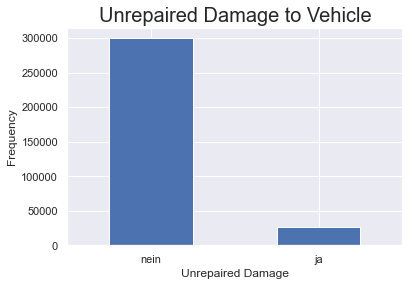

In [1042]:
df['unrepaired damage'].value_counts().plot(kind = 'bar')
plt.title('Unrepaired Damage to Vehicle', size = 20)
plt.xlabel('Unrepaired Damage')
plt.xticks(rotation = 0)
plt.ylabel('Frequency');

__English Translations__ 

nein - no

ja - yes


 A small number of vehicles in our data set have unrepaired damange, which will likely have a negative impact on the price of a car. Damage could range from a minor dent to severe damage to the body of a car. Without having specifics it will be difficult to understand the true impact this feature will have on price.  

### EDA summary 

After analyzing the features we believe will have the greatest correlation to price we can say with some confidence that we will be able to answer the problem in question, which is to accurately predict the resale prices of used cars. There is some concern about the number of outliers in our dataset but because so much of the data is clustered on the lower end of the price range we may be able to avoid any issues with outliers. Scaling back on max price may be done to eliminate outliers so we can focus on a smaller range in price. Outside research shows that the average consumer would not be looking for a used car priced above €20,000 because at this threshold most people would look toward a new car. 

In [ ]:
df.describe()

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True).set_title('Correlation Matrix');

The heatmap above gives us an idea heading into the modeling phase of our project of what features have the strongest linear relationship with price as well as with other features. We don't observe many strong correlations above besides kilometer and price. This is a cause for concern because without strong correlated features the models may have a difficult time making accurate predictions. 

### Revisting Max Price

After running models with a max price of 150,000 we observed RMSE scores above our baseline score. We believed the outliers in the data were having a sizeable affect on our models performance. We keep reducing the price until we were able to see RMSE scores drop below the baseline score.Price max reduced to 20,000 euro as model scores were performing poorly, returning results worse than our baseline model. 70%+ of our data was within this range so there is still a sufficient amount of data for prediction. 

In [1233]:
df = df[df['price'] <= 20_000]

In [1234]:
print(f'Mean Price of Cars: {df.price.mean()}')
print(f'Median Price of Cars: {df.price.median()}')
print(f'Max Car Price: {df.price.max()}') 
print(f'Min Car Price: {df.price.min()}')

Mean Price of Cars: 4901.359352097579
Median Price of Cars: 3200.0
Max Car Price: 20000
Min Car Price: 500


In [1235]:
df.shape

(309738, 20)

## Preprocessing

In [646]:
#df.to_csv('./data/car_data.csv', index = False)

In [1053]:
df.head(1)

,date crawled,name,seller,offer type,price,AB test,vehicle type,gear box,model,kilometer,month of registration,fuel type,brand,unrepaired damage,date created,postal code,last seen,ad duration,age,kw power
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,manuell,a4,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50,14,6,139.745


In [1237]:
df = pd.get_dummies(data = df, columns=['vehicle type',
                                       'gear box',
                                       'fuel type',
                                       'brand',
                                       'unrepaired damage',
                                        #'model'
                                       ], drop_first = True )

In [1273]:
df.shape

(309738, 68)

In [1249]:
X = df.drop(columns = ['date crawled', 'name', 'seller','AB test', 'offer type', 'price','last seen',
                       'date created', 'ad duration', 'postal code', 'model'], axis = 1)
y = df['price']

In [1250]:
df.head(1)

,date crawled,name,seller,offer type,price,AB test,model,kilometer,month of registration,date created,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,unrepaired damage_nein
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,a4,125000,5,2016-03-24,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [1251]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y, random_state = 42)

We perfom a train/test split on the dataset. We split our data into two pieces:

"A Training Set": The subset of the data on which we fit our model.

"A Testing Set": The subset of the data on which we evaluate the quality of our predictions.

In [1252]:
# Code adapted from DSI-11 Local FAQ, https://git.generalassemb.ly/DSI-US-11/local_faq/blob/master/code/custom_cross_val_score.ipynb

def rmse(y_true, y_pred): 
    '''Returns the root mean squared error'''
    return np.sqrt(mean_squared_error(y_true, y_pred))

## Baseline Model

In [1402]:
baseline = DummyRegressor(strategy = 'mean')
baseline.fit(X_train, y_train)
baseline_preds_train = baseline.predict(X_train)
baseline_preds_test = baseline.predict(X_test)

In [1403]:
print('Training RMSE:',rmse(y_train, baseline_preds_train))
print('Testing RMSE:',rmse(y_test, baseline_preds_test))
print(f'Cross Validation Score:', cross_val_score(baseline, X, y, scoring=make_scorer(rmse), cv=5).mean())

Training RMSE: 4522.340583950257
Testing RMSE: 4491.613148683399
Cross Validation Score: 4514.667324642114


A baseline model has been created using the mean sale prices of our target variable price. This model provides a useful point of comparison for all future models used. Once we start getting results from other models our baseline can tell us if a change is adding value or if we need to include different features. If the model achieves a a score that is above the baseline prediction we will know something is wrong and that this model may not be appropriate for our problem. The baseline model is a critical component of our modeling process. We will be using the metric RMSE to score our models performance. The RMSE of our baseline model is €4,491.61(testin. This 

In [ ]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_preds))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_test_preds))))
print(f'Cross Validation Score:',cross_val_score(model, X_train, y_train, cv=5).mean())

## Linear Regression

In [1391]:
model = LinearRegression()

In [1392]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1393]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

In [1395]:
print(f'Training RMSE:', rmse(y_train, y_train_preds))
print(f'Testing RMSE:', rmse(y_test, y_test_preds))
print(f'Cross Validation Score:',cross_val_score(model, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 2983.801463621965
Testing RMSE: 2954.702751072221
Cross Validation Score: 2977.574367447824


The Multiple Linear Regression Model perfoms better than the baseline model which had an RMSE score of 4501.07. However, the scores of this model are poor. The RMSE score is 2638.03 on the training data. With the average price of a car being 4,878.12 this is a considerable amount to be off by. The model seems to suffer from high bias, it is failing to capture the underlying trend in the data. A positive aspect of these scores is is shows that this model is not overfit. An overfit model performs well on the data it is trained on but generalize poorly to any new data. The testing and training scores are very close which means that we have a low amount of variance in our model.  This is the first model we will be using and hopefully the scores will improve from here. 

## Ridge

In [1278]:
#create variable for Sklearn StandardScaler to be used in Ridge and Lasso Models 
ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)

X_test_sc = ss.transform(X_test)

In [1380]:
r_alphas = np.logspace(1,5,100)

In [1383]:
ridge = RidgeCV(alphas = r_alphas, cv = 5)

In [1385]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [1387]:
#Optomal value of alpha
ridge.alpha_

148.4968262254465

In [1388]:
y_train_ridge = ridge.predict(X_train_sc)
y_test_ridge = ridge.predict(X_test_sc)

In [1389]:
print(f'Training RMSE:', rmse(y_train, y_train_ridge))
print(f'Testing RMSE:', rmse(y_test, y_test_ridge))
print(f'Cross Validation Score:',cross_val_score(ridge_gs, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 2983.805367830393
Testing RMSE: 2954.7040901159853
Cross Validation Score: 2977.5724415780523


Ridge Regression is A variation of linear regression with L2 regularization. Regularization adds penalty for higher terms in the model and thus controls the model complexity. If a regularization term is added, the model tries to minimize both loss and complexity of model. Limiting the complexity prevents the model from overfitting. Ridge model shrinks our regression coefficients clsoer to zero to make our model simpler. We are accepting more bias in exchange for a decrease in variance. We observe a slightly lower training score in comparison to our Linear Regression model but a higher testing score. This is surprising as we would expect to see an improvement in the fitness of our model. We can infer from the scores so far that the model is having a difficulty making accurate predictions on the target variable price. There may be too many features that are not linearly realted which are adding noise to the model making it difficult to learn. 

## Lasso

In [1362]:
#create list of alphas 
l_alphas = np.logspace(1, 3, 50)

In [1368]:
#Cross-validate over our list of lasso alpahs
lasso = LassoCV(max_iter = 50_000, alphas = l_alphas, cv = 5, )

In [1369]:
# Fit lasso model with best ridge alpha
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,   49.41713361,   54.28675439,   59.63623317,
         65.51285569,   71.9685673 ,   79.06043211,   86.85113738,
         95.40954763,  104.81131342,  115.13953993,  126.48552169,...
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [1390]:
# Optimal value of alpha
lasso.alpha_

10.0

In [1372]:
y_train_lasso = lasso.predict(X_train_sc)
y_test_lasso = lasso.predict(X_test_sc)

In [1373]:
print(f'Training RMSE:', rmse(y_train, y_train_lasso))
print(f'Testing RMSE:', rmse(y_test, y_test_lasso))
print(f'Cross Validation Score:',cross_val_score(lasso, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 2984.78204745922
Testing RMSE: 2955.526653126418
Cross Validation Score: 3012.5778657112824


Lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the model. It uses shrinkage wherw data values are shrunk towards a central point, like the mean. We observe almost identical scores as the ridge regression model. The lasso model does not perform well with so many features in our model. If we were to reduce these features after assessing the strongest coefficeints the model may perform better. 

## Decision Tree

In [1312]:
dtr = DecisionTreeRegressor()

# create paramters
dtr_params = {
    'max_depth': [15, 20],
    'max_features': [10, 15],
    'min_samples_leaf': [5, 6],
    'min_samples_split': [10],
}


 # Grid Search over parameters 
gs = GridSearchCV(dtr, param_grid=dtr_params, cv = 5, scoring = make_scorer(rmse))


In [1313]:
d_tree = gs.fit(X_train, y_train)

In [1314]:
d_tree.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

In [ ]:
dtr.best_params_

In [1316]:
dtree_train_preds = d_tree.predict(X_train)
dtree_test_preds = d_tree.predict(X_test)

In [1317]:
print(f'Training RMSE:', rmse(y_train, dtree_train_preds))
print(f'Testing RMSE:', rmse(y_test, dtree_test_preds))
print(f'Cross Validation Score:',cross_val_score(gs.best_estimator_, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 2574.526316007193
Testing RMSE: 2600.3928222625846
Cross Validation Score: 2226.647716087623


The first of the tree based models will will use is the decision tree model. The decision tree builds regression models in the form of a tree structure. It breaks down the dataset into smaller and smaller subsets while at the same time an assocaited decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. The decision tree model perfomed better than all of the linear regression models, achieving a training score below RMSE 2,000 at 1909.74. The testing score was RMSE 2035.87 which tell us this model is somewhat overfit. We anticipate using a Random Forest model will reduce the variance and improve the RMSE scores.

## Bagging Regressor

In [1332]:
br = BaggingRegressor

# construct paramters
br_params = {
    'max_samples': [15, 20],
    'max_features': [10, 15],
    'n_estimators': [50,100]
}


 # Perform Grid Search
gs_br = GridSearchCV(br, param_grid=br_params, cv = 5, scoring = make_scorer(rmse))

In [1333]:
bag_reg = gs_br.fit(X_train, y_train)

TypeError: Cannot clone object '<class 'sklearn.ensemble._bagging.BaggingRegressor'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

## Random Forest

In [1323]:
rfr = RandomForestRegressor()

# construct paramters
rfr_params = {
    'max_depth': [15, 20],
    'max_features': [10, 15],
    'min_samples_leaf': [5, 6],
    'min_samples_split': [10],
    'n_estimators': [50, 100,]
}

 # Perform Grid Search
gs_rfr = GridSearchCV(rfr, param_grid=rfr_params, cv = 5, scoring = make_scorer(rmse))


In [1324]:
rfr_ = gs_rfr.fit(X_train, y_train)

In [1326]:
rfr_train_preds = rfr_.predict(X_train)
rfr_test_preds = rfr_.predict(X_test)

In [1327]:
print(f'Training RMSE:', rmse(y_train, rfr_train_preds))
print(f'Testing RMSE:', rmse(y_test, rfr_test_preds))
print(f'Cross Validation Score:',cross_val_score(rfr_, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 1811.3014971782886
Testing RMSE: 1838.6925654580568
Cross Validation Score: 1858.752504617337


Random forest is an ensemble of randomized regression trees. Random Forests correct for decision trees' habit of overfitting to their training data. We took two approaches with the Random Forest model, first we ran the model without a grid search and then added a gridsearch in an attempt to identify the best hyperparameters. The Random Forest Regressor performed better without a gridsearch which is odd because the gridsearch should identify the best hyperparameters to include in a random forest regressor. The RMSE training score from the random forest regressor w/out a gridsearch was RMSE 1274.46 the testing score was RMSE 1710.21. This model has scored the best so far however it is clear by the difference in training and testing scores that the model suffers from high variance. It is overfit and which is indicative of poor model. The next step is to use an Extra Trees model to help reduce the high variance and hopefull improve the score. 

### Extra Trees

*Gridsearch only contains pre-determined best parameters to efficiently run notebook in its entirety

In [1374]:
etr = ExtraTreesRegressor()

# construct paramters
etr_params = {
    'max_depth': [15],
    'max_features': [10],
    'min_samples_leaf': [5],
    'min_samples_split': [10],
    'n_estimators': [50]
}

 # Perform Grid Search
gs_efr = GridSearchCV(etr, param_grid=etr_params, cv = 5, scoring = make_scorer(rmse))

In [1375]:
gs_efr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             par

In [1376]:
gs_efr.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [1377]:
y_train_pred_etr = gs_efr.predict(X_train)
y_pred_etr = gs_efr.predict(X_test)

In [1379]:
print(f'Training RMSE:', rmse(y_train, y_train_pred_etr))
print(f'Testing RMSE:', rmse(y_test, y_pred_etr))
print(f'Cross Validation Score:',cross_val_score(gs_efr, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 2540.887676230132
Testing RMSE: 2548.7640342671607
Cross Validation Score: 2569.2925610541397


## Gradient Boost

In [1352]:
gbr = GradientBoostingRegressor 

# create paramters
gbr_params = {
    'n_estimators': [100,200],
    'max_depth': [15, 20],
    'learning_rate': [0.02, 0.04, 1],
    'min_samples_split': [5, 10],
}


 # Grid Search over parameters 
gbr_gs = GridSearchCV(gbr, param_grid = gbr_params, cv = 5, scoring = make_scorer(rmse))


In [1353]:
gbr_gs.fit(X_train, y_train)

TypeError: Cannot clone object '<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [1354]:
y_train_pred_gbr = gbr_gs.predict(X_train)
y_pred_gbr = gbr_gs.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
print(f'Training RMSE:', rmse(y_train, y_train_pred_gbr))
print(f'Testing RMSE:', rmse(y_test, y_pred_gbr))
print(f'Cross Validation Score:',cross_val_score(gbr_gs, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

In [1355]:
params = {'n_estimators': 200, 'max_depth': 5,
          'learning_rate': 0.02, 'loss': 'ls'}

#gbr = GradientBoostingRegressor(random_state = 42)
gbr = GradientBoostingRegressor(**params)

#Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1356]:
y_preds_train_gbr = gbr.predict(X_train)
y_preds_gbr = gbr.predict(X_test)

In [1357]:
print(f'Training RMSE:', rmse(y_train, y_preds_train_gbr))
print(f'Testing RMSE:', rmse(y_test, y_preds_gbr))
print(f'Cross Validation Score:',cross_val_score(gbr, X, y, cv = 5, scoring = make_scorer(rmse)).mean())

Training RMSE: 1934.7273403704137
Testing RMSE: 1916.762142917575
Cross Validation Score: 1936.5234267006126


## Model Selection

|Model|Training RMSE Score|Testing RMSE Score|
|:---|:---|:---|
|Linar Regression|2983.801|2954.703|
|Ridge|2983.805|2954.704|
|Lasso|1983.579|7753727.709|
|Decision Tree|2574.526|2600.392|
|Random Forest|1811.301|1838.693|
|Extra Trees*|2540.888|2548.764|
|Gradient Boost|1934.727|1916.762|

Two models were in consdieration for model selection. The Random Forest model and the Gradient Boost model. The Random Forest model had a RMSE training score of 1274.47 and a testing score of 1710.21. The Gradient Boost model had a training score of 1223.34 and a testing score of 1343.34. The Random Forest had better scores overall but the difference between the training and the testing score shows that the model was overfit. This high amount of variance is problematic as this model may not peform well on other data sets. The Gradient Boost was the second best perfomer score wise but it was much better fit. We have more confidence in this model if it was used with new data. 

## Model Evaluation

In [ ]:
#Residuals Plot
plt.figure(figsize=(8,6))
plt.title('Residuals Plot',size=22)
plt.xlabel('Predictions',size=16)
plt.ylabel('Residuals',size=16)
plt.axhline(0, c = "r")
plt.scatter(gamma_log_tr_preds, train_resids, label='Training data', alpha = .4,color='blue');
plt.scatter(gamma_log_te_preds, test_resids, label='Testing data',alpha = .4,color='orange');
plt.legend(loc='upper right',fontsize='x-large');

### Plotting Actual vs. Predicted Price

In [ ]:
plt.figure(figsize=(12,6.5))
sns.scatterplot(y_test, y_preds_gbr)
plt.title('Predicted Price vs. Actual Price', size = 20)
plt.xlabel('Actual Price')
plt.ylabel('Predictions')
plt.savefig('a.png')
plt.plot([0, np.max(y_preds_gbr)],
         [0, np.max(y_preds_gbr)],
         color = 'black');

It is hard to tell because there a high volumne of plots in above scatterplot but we can say with confidence that we observe heteroscedasticity. These plots do not have a similar scatter and from lowest to highest price we observe predictions that are extremely far off from the actual price. We also observe a fan out effect of our plots especially as the true values increase in price. As price increases we observe many predictions that are making predictions that are much lower than the actual price of the car. We can see from this plot that the model struggled to make accurate predictions as the actual price of the car increased, prediciting much lower prices than the true price of the cars. 

### Residuals Plot

In [ ]:
saw was below 1 day.

In [190]:
plt.figure(figsize=(8,6))
plt.title('Residuals Plot',size=22)
plt.xlabel('Predictions',size=16)
plt.ylabel('Residuals',size=16)
plt.axhline(0, c = "r")
plt.scatter(gamma_log_tr_preds, train_resids, label='Training data', alpha = .4,color='blue');
plt.scatter(gamma_log_te_preds, test_resids, label='Testing data',alpha = .4,color='orange');
plt.legend(loc='upper right',fontsize='x-large');

### Residuals Distribution 

In [ ]:
plt.title("Distribution of Residuals", fontsize = 20)
residuals.hist(bins = 25);

### Feature Importance

fter being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature. Feature selection methods can give you useful information on the relative importance or relevance of features for a given problem. You can use this information to create filtered versions of your dataset and increase the accuracy of your models.

In [ ]:
f_importance = gbr.feature_importances_

f_list=X_train.columns

df_feature_importance=pd.DataFrame(f_importance,columns=['importance'],index=f_list).sort_values(['importance'],ascending=False)

In [ ]:
f_list=X.columns
df_gbr = pd.DataFrame(f_importance,index=f_list,columns=['importance']).sort_values(['importance'],ascending=False)
df_gbr.head(10)

In [ ]:
#plot the feature importance
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(top10_features.index,top10_features['importance'],data=top10_features)
plt.xlabel('Feature')
plt.title('Top 10 Features', size = 20)
plt.xticks(rotation=45);

Analyzing the features with the highest coefficients to price we observe the two features we hypothesized while doing our EDA in the top three. This comes as no surprise as intuition tells us that age and kilometers driven are the most important features when evaluating the re-sale value of a used car. Age seemed to be the most important factor. This is likely due to the fact that even if the odometer is realatively low on ab old car it just has had more time to wear. More things like rust, worn interior, outdated parts that may be hard to find are all contributing factors to price. Kilometers driven goes hand in hand with this, as mentioned in EDA there is a linear relation between these two variables. The older the car the higher the number on the odometer. 

The fact that Kilowatts is the second most important feature was somewhat surprising. At first it didn't make sense but after further research we learned that higher Kilowatts usually correlates to larger engine size. Engines being arguably the most important component of an automobile it is logical to assume that the larger the engine the higher the price of a car would be. Large powerful engines are also usually associated with luxury automobiles. 

## Interpretable Model/Model Coefficients

Additionally we wanted to analyze an interpretable model to gain a better understaning of the most important features when predicting price. Here we are able to intepret the models coefficients. Our best performing Linear Regression model was the Ridge model.

In [ ]:
coef_df = pd.DataFrame({'name':X.columns, 'coeff':ridge.coef_})
coef_df.sort_values(by='coeff', ascending = False)

In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.

A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

When analyzing the coefficients of a higest correlated features we see age has a coefficent of -1,404.34. This can be interpreted by saying, as the age of a car increases by one unit (one year), then we expect the price of the car to decrease by €1,402.35 all else being equal. Now logically this does not make sense as if a car had a true value of € 5,000 in four years the car would be worth a negative amount. This is the weight our model is putting on this feature. We see here that this feature has a strong correlation to price and greatly affects the models prediction of a cars price. 

For the positve coefficeints we observe the top five are categorical variables. This could be interpreted as "if the car is a Audi it will have an €816.06 increase in our y variable (price). 

In [ ]:
def plot_coef(model, top_n = 10):
    cols = X_train.columns
    coef = ridge.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

In [ ]:
plot_coef(ridge)
plt.title('Model Coefficients', size = 20)
plt.xlabel('Coefficient')
plt.ylabel('Features');